In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
np.random.seed(3)

In [3]:
bukayo = "buyakosaka.xlsx"
df = pd.read_excel(bukayo)
column_data = df.iloc[:, 0].tolist()
print(column_data)

[0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [4]:
def calculate_transition_percentages(numbers):
    transitions = {}

    for i in range(len(numbers) - 1):
        current_number = numbers[i]
        next_number = numbers[i + 1]

        if current_number not in transitions:
            transitions[current_number] = {}

        if next_number not in transitions[current_number]:
            transitions[current_number][next_number] = 0

        transitions[current_number][next_number] += 1

    percentages = {}

    for current_number, next_numbers in transitions.items():
        total_transitions = sum(next_numbers.values())
        percentages[current_number] = {}

        for next_number, count in next_numbers.items():
            percentage = (count / total_transitions) * 100
            percentages[current_number][next_number] = percentage

    return percentages

In [5]:
transition_percentages = calculate_transition_percentages(column_data)
print(transition_percentages)

{0: {0: 69.23076923076923, 1: 28.205128205128204, 2: 2.564102564102564}, 1: {0: 68.75, 1: 25.0, 3: 6.25}, 2: {2: 50.0, 1: 50.0}, 3: {0: 100.0}}


In [6]:
StatesGoalsData = ['None','Once','Twice','Hat-Trick']

In [20]:
transition_states = [
    ['None-to-None', 'None-to-Once', 'None-to-Twice', 'None-to-Hat-Trick'],
    ['Once-to-None', 'Once-to-Once', 'Once-to-Twice', 'Once-to-Hat-Trick'],
    ['Twice-to-None', 'Twice-to-Once', 'Twice-to-Twice', 'Twice-to-Hat-Trick'],
    ['Hat-Trick-to-None', 'Hat-Trick-to-Once', 'Hat-Trick-to-Twice', 'Hat-Trick-to-Hat-Trick']
]
transition_matrix = [
    [0.6923, 0.2821, 0.02560, 0],
    [0.6875, 0.25, 0, 0.0625],
    [0, 0.5, 0.5, 0],
    [1, 0, 0, 0]
]

In [22]:
ScoringProcess = list()
NumMatches = 100
if column_data[0] == 0:
    InitialState = "None"
elif column_data[0] == 1:
    InitialState = "Once"
elif column_data[0] == 2:
    InitialState = "Twice"
else:
    InitialState = "Hat-Trick"
print('Recent match result =',InitialState)

Recent match result = None


In [32]:
for i in range(0, NumMatches):
    if InitialState == 'None':
        TransCondition = np.random.choice(transition_states[0],replace=True,p=transition_matrix[0])
        if TransCondition == 'None-to-None':
            pass
        elif TransCondition == 'None-to-Once':
            InitialState = 'Once'
        elif TransCondition == 'None-to-Twice':
            InitialState = 'Twice'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Once':
        TransCondition = np.random.choice(transition_states[1],replace=True,p=transition_matrix[1])
        if TransCondition == 'Once-to-Once':
            pass
        elif TransCondition == 'Once-to-None':
            InitialState = 'None'
        elif TransCondition == 'Once-to-Twice':
            InitialState = 'Twice'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Twice':
        TransCondition = np.random.choice(transition_states[2],replace=True,p=transition_matrix[2])
        if TransCondition == 'Twice-to-Twice':
            pass
        elif TransCondition == 'Twice-to-None':
            InitialState = 'None'
        elif TransCondition == 'Twice-to-Once':
            InitialState = 'Once'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Hat-Trick':
        TransCondition = np.random.choice(transition_states[3],replace=True,p=transition_matrix[3])
        if TransCondition == 'Hat-Trick-to-Hat-Trick':
            pass
        elif TransCondition == 'Hat-Trick-to-None':
            InitialState = 'None'
        elif TransCondition == 'Hat-Trick-to-Once':
            InitialState = 'Once'
        else:
            InitialState = 'Twice'
            
    ScoringProcess.append(InitialState)
    print(InitialState)

None
Once
Hat-Trick
None
None
Once
None
None
Once
None
None
Once
None
None
None
None
None
Once
None
Once
None
Once
Once
Once
None
None
None
Once
Once
None
None
Once
None
None
None
Once
None
None
None
None
Once
None
None
None
None
Once
Hat-Trick
None
None
None
Twice
Once
Once
None
None
Once
None
None
None
None
None
None
None
Once
None
None
None
Twice
Twice
Once
None
None
Once
None
Once
Once
Once
Once
None
None
Once
Hat-Trick
None
None
Once
Once
Once
None
Once
None
None
Twice
Twice
Twice
Twice
Twice
Once
None
Once
None


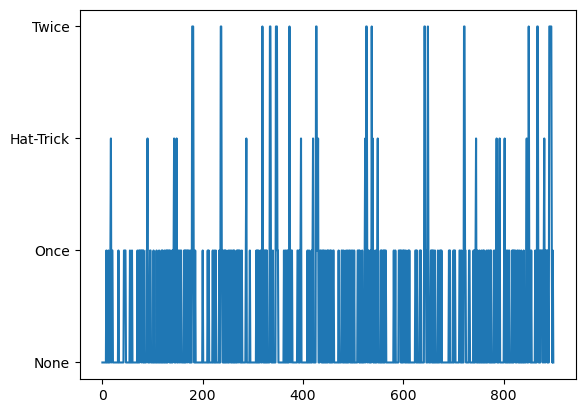

In [33]:
plt.plot(ScoringProcess)
plt.show()